In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
dtypes = {'aircraft': 'int32', 'numMeasurements': 'int16', 'serial_1': 'int32',  'serial_2': 'int32', 'serial_3': 'int32','type_sensor_1': 'category', 'type_sensor_2': 'category', 'type_sensor_3': 'category'}
train_df = pd.read_csv('training_6_category_1/prepped_data.csv', dtype=dtypes, parse_dates=['timeAtServer', 'timestamp_1', 'timestamp_2', 'timestamp_3'])
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844972 entries, 0 to 1844971
Data columns (total 28 columns):
 #   Column              Dtype   
---  ------              -----   
 0   timeAtServer        object  
 1   aircraft            int32   
 2   latitude_aircraft   float64 
 3   longitude_aircraft  float64 
 4   baroAltitude        float64 
 5   geoAltitude         float64 
 6   numMeasurements     int16   
 7   serial_1            int32   
 8   timestamp_1         object  
 9   signal_strength_1   float64 
 10  serial_2            int32   
 11  timestamp_2         object  
 12  signal_strength_2   float64 
 13  serial_3            int32   
 14  timestamp_3         object  
 15  signal_strength_3   float64 
 16  latitude_sensor_1   float64 
 17  longitude_sensor_1  float64 
 18  height_sensor_1     float64 
 19  type_sensor_1       category
 20  latitude_sensor_2   float64 
 21  longitude_sensor_2  float64 
 22  height_sensor_2     float64 
 23  type_sensor_2       category
 24

,timeAtServer,aircraft,latitude_aircraft,longitude_aircraft,baroAltitude,geoAltitude,numMeasurements,serial_1,timestamp_1,signal_strength_1,...,height_sensor_1,type_sensor_1,latitude_sensor_2,longitude_sensor_2,height_sensor_2,type_sensor_2,latitude_sensor_3,longitude_sensor_3,height_sensor_3,type_sensor_3
0,0.0,1644,48.821686,9.460285,12192.00,12809.22,6,248,983521375.0,54.0,...,321.081635,Radarcape,50.048573,8.487899,82.381000,GRX1090,50.048573,8.487899,82.381000,GRX1090
1,0.0,2184,49.810226,8.533052,7985.76,8420.10,2,125,995644625.0,108.0,...,497.984192,Radarcape,48.178822,12.235501,529.392761,Radarcape,48.178822,12.235501,529.392761,Radarcape
2,0.0009999275207519,1453,48.471587,14.024048,12192.00,12793.98,3,10,946077203.0,132.0,...,430.682400,Radarcape,48.891468,9.177591,302.881989,Radarcape,48.891468,9.177591,302.881989,Radarcape
3,0.0019998550415039,119,48.695572,9.116610,8663.94,9182.10,4,123,994055875.0,79.0,...,754.537476,Radarcape,47.400170,8.630680,430.682400,Radarcape,47.400170,8.630680,430.682400,Radarcape
4,0.0019998550415039,312,47.209076,10.070480,11277.60,11849.10,5,206,978620859.0,68.0,...,1699.392950,Radarcape,46.762415,7.600441,594.318000,GRX1090,46.762415,7.600441,594.318000,GRX1090


In [3]:
le = LabelEncoder()
le.fit(train_df['type_sensor_1'].unique())

LabelEncoder()

In [4]:
train_df['type_sensor_1'] = le.transform(train_df['type_sensor_1'])
train_df['type_sensor_2'] = le.transform(train_df['type_sensor_2'])
train_df['type_sensor_3'] = le.transform(train_df['type_sensor_3'])

In [5]:
for col in ['1', '2', '3']:
    train_df['type_sensor_' + col] = train_df['type_sensor_' + col].astype('category')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844972 entries, 0 to 1844971
Data columns (total 28 columns):
 #   Column              Dtype   
---  ------              -----   
 0   timeAtServer        object  
 1   aircraft            int32   
 2   latitude_aircraft   float64 
 3   longitude_aircraft  float64 
 4   baroAltitude        float64 
 5   geoAltitude         float64 
 6   numMeasurements     int16   
 7   serial_1            int32   
 8   timestamp_1         object  
 9   signal_strength_1   float64 
 10  serial_2            int32   
 11  timestamp_2         object  
 12  signal_strength_2   float64 
 13  serial_3            int32   
 14  timestamp_3         object  
 15  signal_strength_3   float64 
 16  latitude_sensor_1   float64 
 17  longitude_sensor_1  float64 
 18  height_sensor_1     float64 
 19  type_sensor_1       category
 20  latitude_sensor_2   float64 
 21  longitude_sensor_2  float64 
 22  height_sensor_2     float64 
 23  type_sensor_2       category
 24

## Plot correlation
The plot shows that lat for all 3 sensors correlate strongly with each other and the same is true for long of all three sensors.
The three sensors should be positioned relatively close to each other as they got the same signal from the aircraft.

Further, the plot shows a correlation between the lat of the aircraft and the lat of the three sensors, same is true for long.

/tmp/ipykernel_29042/1340841300.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(train_df.corr(), fignum=f.number)


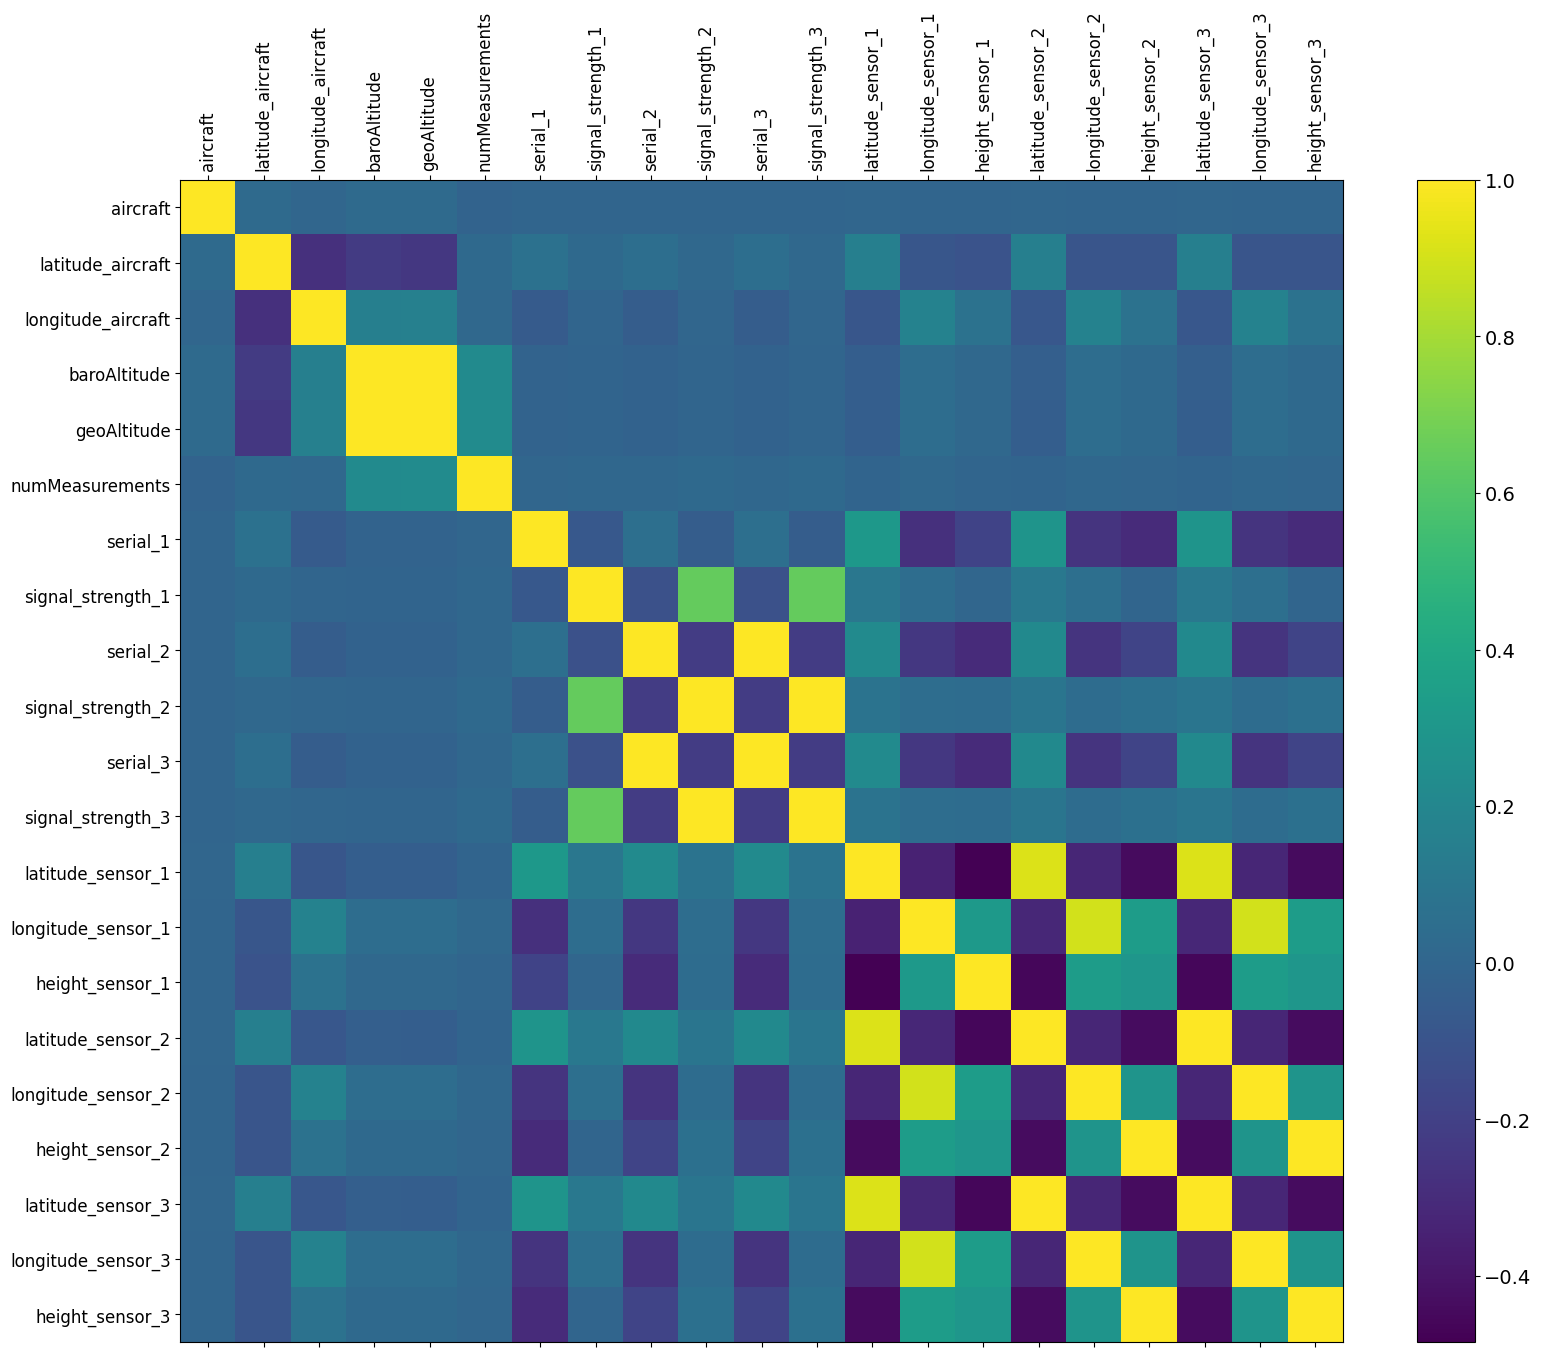

In [6]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train_df.corr(), fignum=f.number)
plt.xticks(range(train_df.select_dtypes('number').shape[1]), train_df.select_dtypes('number').columns, fontsize=12, rotation=90)
plt.yticks(range(train_df.select_dtypes('number').shape[1]), train_df.select_dtypes('number').columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.show()

Drop indices of aircraft and sensors as they must not be learned!

In [7]:
train_df.drop(columns=['aircraft', 'serial_1', 'serial_2', 'serial_3'], inplace=True)

In [8]:
X = train_df.drop(columns=['latitude_aircraft', 'longitude_aircraft', 'geoAltitude', 'baroAltitude'])
Y = train_df[['latitude_aircraft', 'longitude_aircraft', 'geoAltitude', 'baroAltitude']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

To see how good our trained model performs, we set a base line for orientation.
First, we calculate the mean for long and lat from all three sensors

In [10]:
mean_long = X[['longitude_sensor_1', 'longitude_sensor_2', 'longitude_sensor_3']].mean(axis=1)
mean_lat = X[['latitude_sensor_1', 'latitude_sensor_2', 'latitude_sensor_3']].mean(axis=1)

In [11]:
print(f"r2 long: {r2_score(Y['longitude_aircraft'], mean_long)}")
print(f"r2 lat: {r2_score(Y['latitude_aircraft'], mean_lat)}")
print(f"mse long: {mean_squared_error(Y['longitude_aircraft'], mean_long)}")
print(f"mse lat: {mean_squared_error(Y['latitude_aircraft'], mean_lat)}")

r2 long: -0.5449495966715578
r2 lat: -0.5640728431708735
mse long: 27.309766096597272
mse lat: 14.915097745412027
